Code accompanying Lec 11 demonstrating POD and DMD.

We start with POD. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# first load frames of cylinder flow simulation
from google.colab import drive
drive.mount('/content/drive')

data = np.load("/content/drive/MyDrive/Courses/AMATH482582-WIN2022/Notebooks/CylData/cyldata.npy")
Nx = 200 
Ny = 50

In [7]:
# ax0 is the flattened frames and ax1 are the time frames

# compute svd of data

import numpy.matlib as matlib

mean_data = np.mean(data, 1)

centered_data = data - np.transpose(matlib.repmat(mean_data, 200,1))

dU, ds, dVt = np.linalg.svd(centered_data, full_matrices=False)

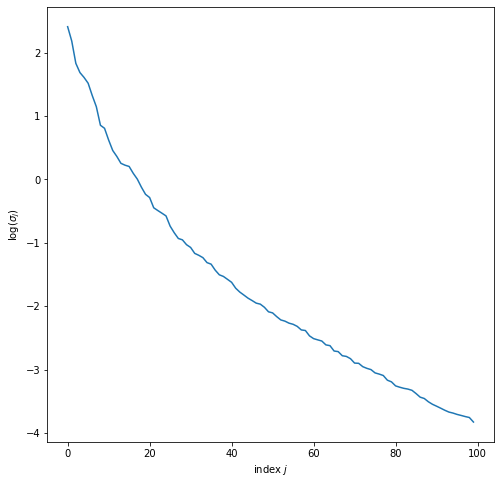

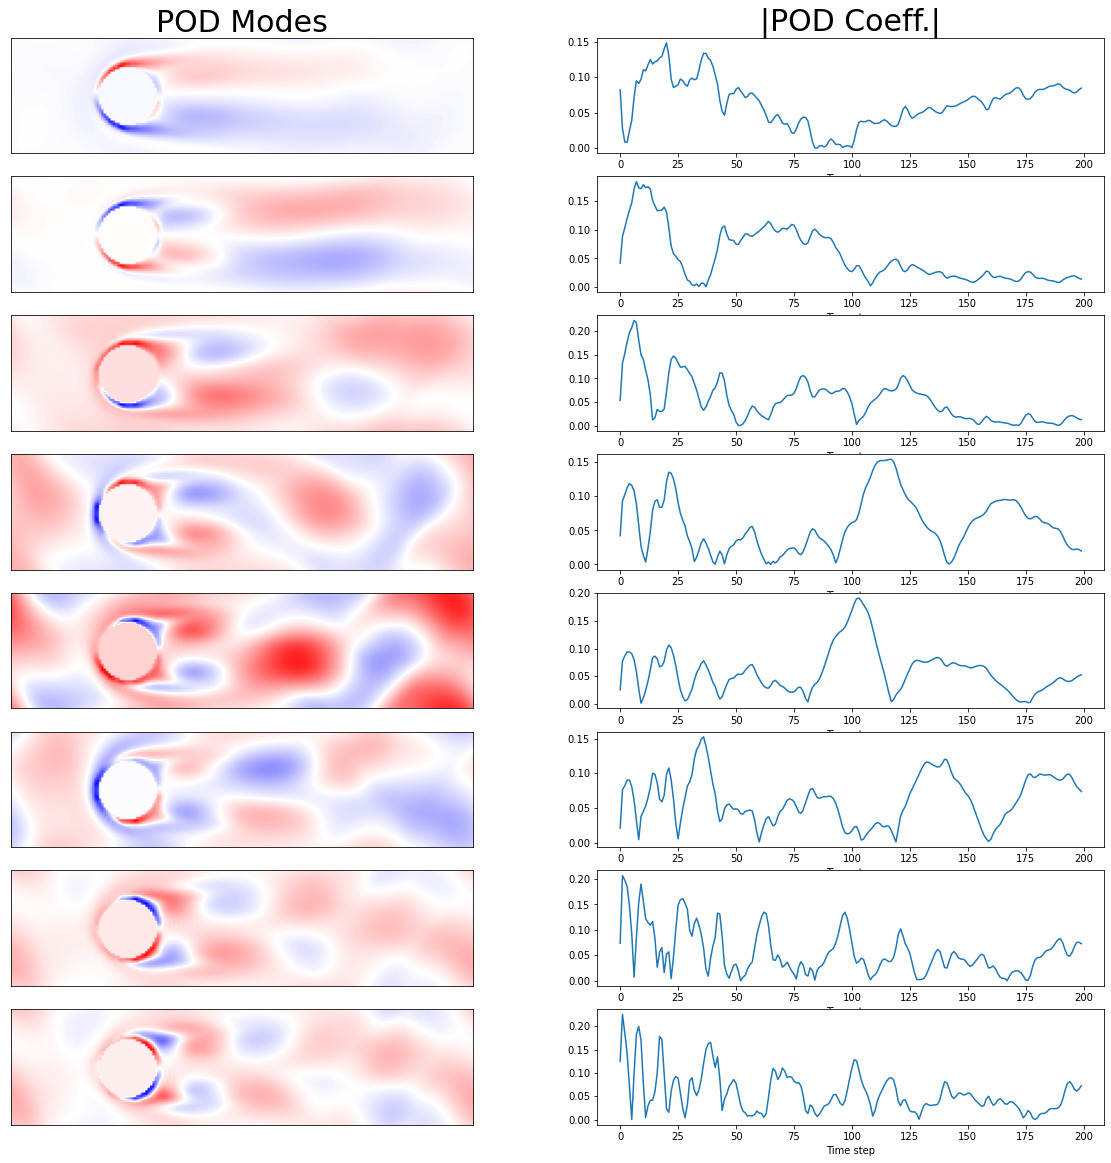

In [11]:
# plot some of the singular values and some of the principal modes 


fig, ax = plt.subplots(1,1, figsize = (8,8))

ax.plot(np.log(ds[0:100]))
ax.set_xlabel('index $j$')
ax.set_ylabel('$\log(\sigma_j)$')
#ax.set_xlim(0, 150)


fig, ax = plt.subplots(8,2, figsize=(20,20))

for j in range(8):

  ax[j][0].imshow( np.reshape(dU[:,j], (Ny, Nx)), cmap = 'bwr' )
  ax[j][0].get_xaxis().set_visible(False)
  ax[j][0].get_yaxis().set_visible(False)	
  ax[j][0].set_aspect('equal')

  ax[j][1].plot( np.abs(dVt[j,:]))
  ax[j][1].set_xlabel('Time step')
  
  if j==0: 
    ax[j][0].set_title('POD Modes', fontsize=30)
    ax[j][1].set_title('|POD Coeff.|', fontsize=30)

plt.show()	

In [5]:
# approximate the dynamics using the POD modes only keeping the first 40 and compare to original data. 

dss = np.copy(ds)

dss[10:None] = 0

# low rank approx
approx_centered_data = np.dot( dU, np.dot(np.diag(dss), dVt ) )

print(approx_centered_data.shape)

# add the mean back
approx_data = approx_centered_data + np.transpose(matlib.repmat(mean_data, 200,1))

(10000, 200)


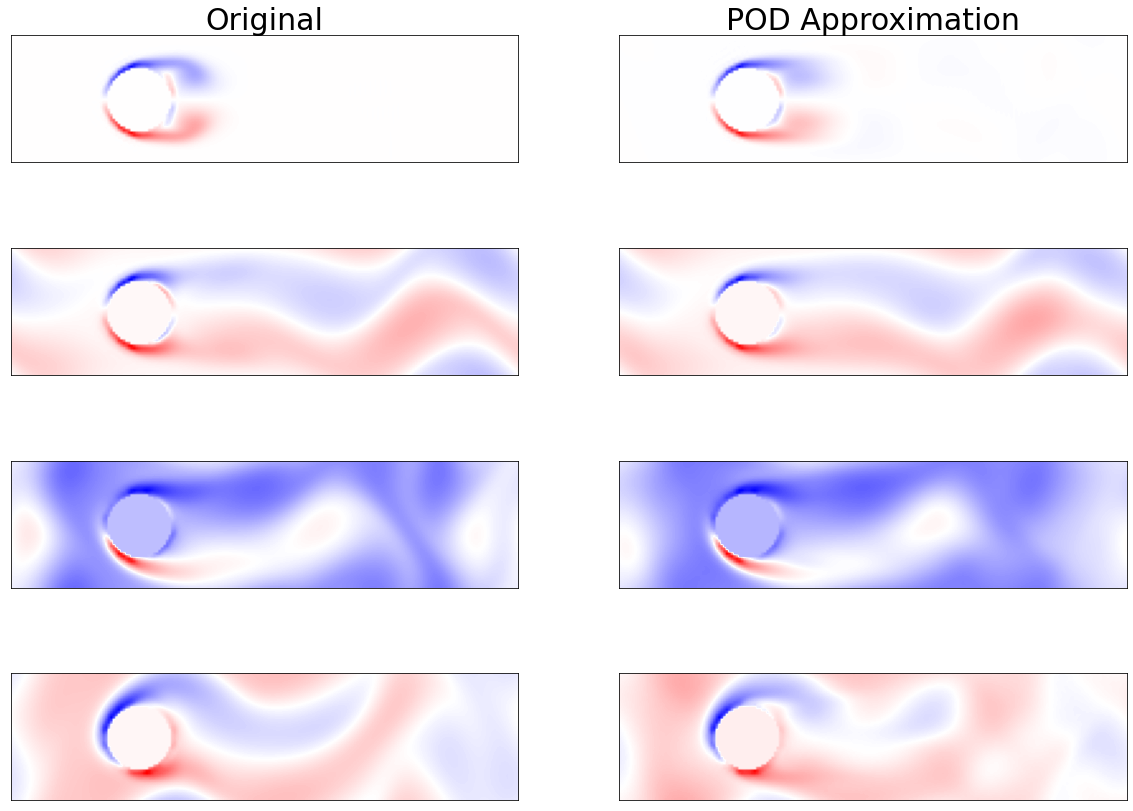

In [15]:
# side by side comparison of original and approximate dynamics

fig, ax = plt.subplots( 4, 2, figsize=(20, 15))

frm_indx = [10, 100, 150, 199]

for j in range(4):

  ax[j][0].imshow( np.reshape(data[:, frm_indx[j] ], (Ny, Nx)), cmap='bwr')
  ax[j][0].get_xaxis().set_visible(False)
  ax[j][0].get_yaxis().set_visible(False)	
  ax[j][0].set_aspect('equal')

  ax[j][1].imshow( np.reshape(approx_data[:, frm_indx[j] ], (Ny, Nx)), cmap='bwr' )
  ax[j][1].get_xaxis().set_visible(False)
  ax[j][1].get_yaxis().set_visible(False)	
  ax[j][1].set_aspect('equal')

  if j == 0 :
    ax[j][0].set_title('Original', fontsize=30)
    ax[j][1].set_title('POD Approximation', fontsize=30)

Now we take a quick look at DMD using the pydmd package. 

In [17]:
# uncomment if you want to instal PyDMD 

!pip install pydmd

     |████████████████████████████████| 40 kB 6.5 MB/s 


In [18]:
from pydmd import DMD 

/usr/local/lib/python3.7/dist-packages/pydmd/dmdbase.py:351: UserWarning: Input data matrix X has condition number 6066762272854810.0. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


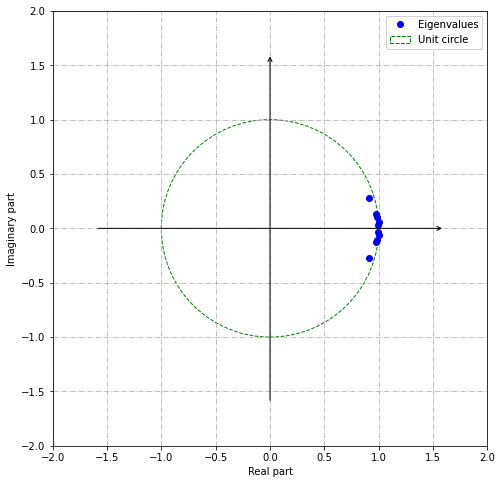

In [35]:
# first we create a DMD object 
dmd = DMD(svd_rank=10) # a rank 10 approximation to the dynamic matrix A

dmd.fit( centered_data ) # simply pass centered data set of snapshots to the dmd class

dmd.plot_eigs(show_axes=True)

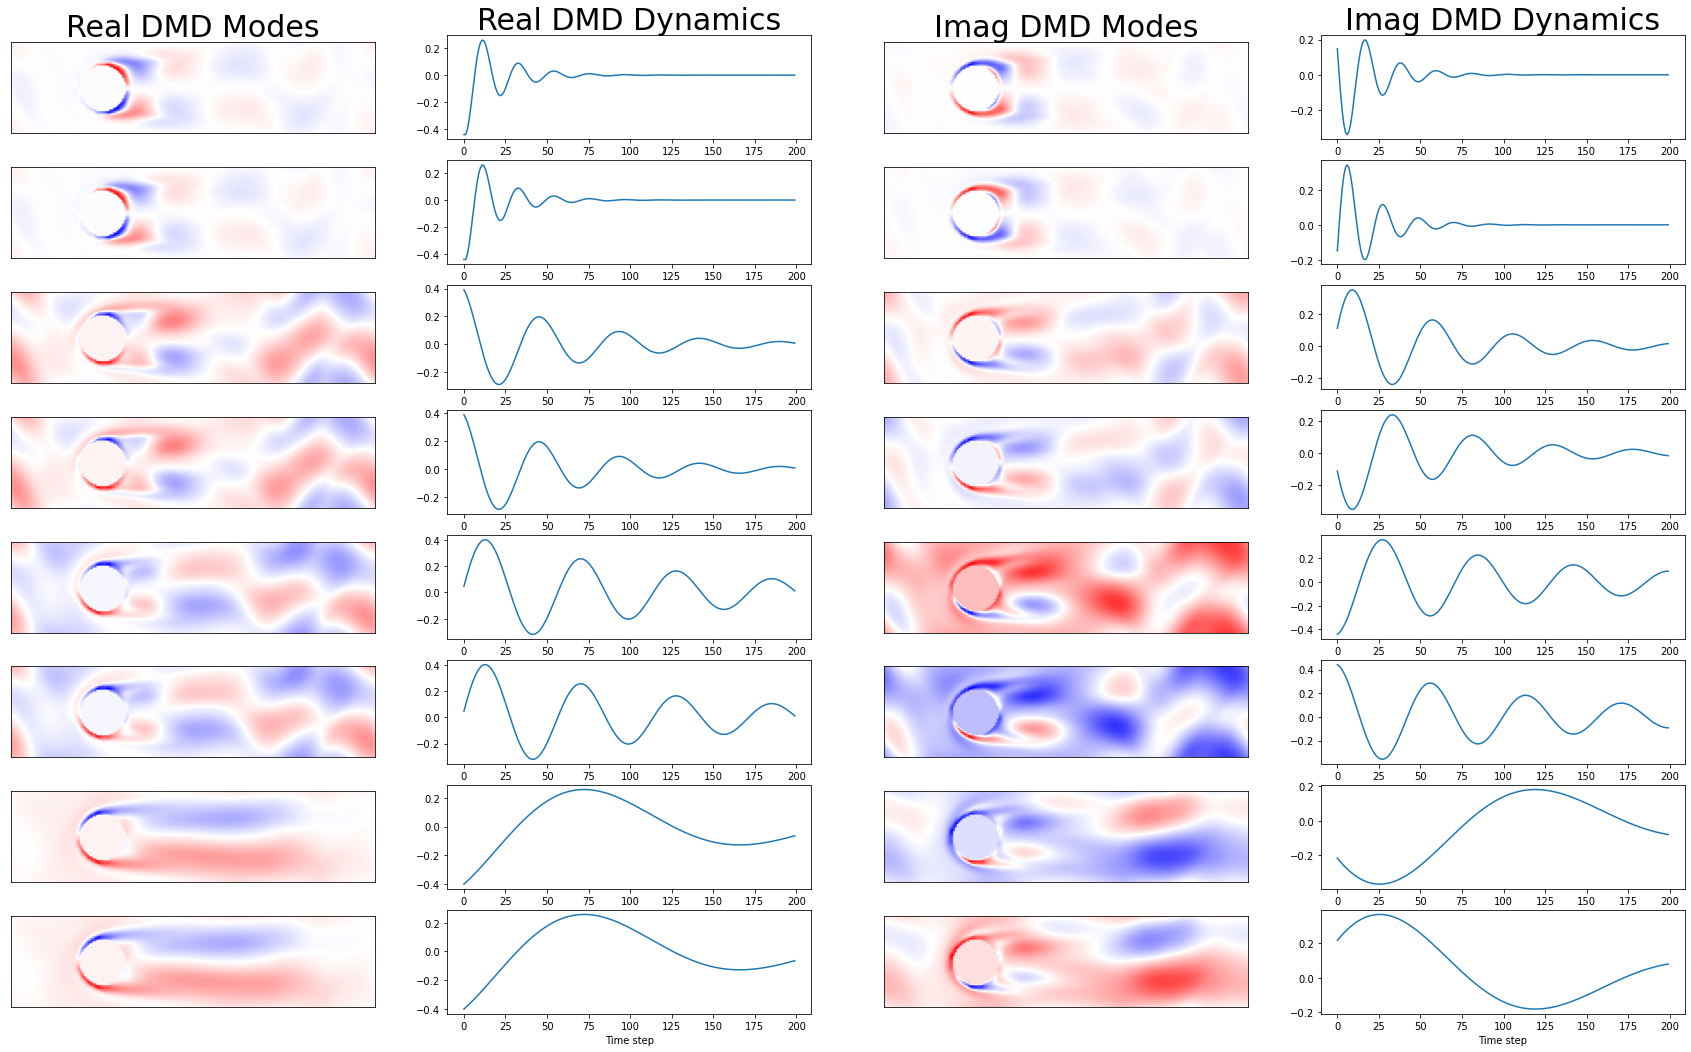

In [39]:
# now plot the DMD modes and the temporal dynamics as we did for POD 

fig, ax = plt.subplots(8,4, figsize=(30,18))

for j in range(8):

  ax[j][0].imshow( np.reshape(np.real(dmd.modes[:,j]), (Ny, Nx)), cmap = 'bwr' )
  ax[j][0].get_xaxis().set_visible(False)
  ax[j][0].get_yaxis().set_visible(False)	
  ax[j][0].set_aspect('equal')

  ax[j][1].plot( np.real(dmd.dynamics[j,:]))
  ax[j][1].set_xlabel('Time step')

  ax[j][2].imshow( np.reshape(np.imag(dmd.modes[:,j]), (Ny, Nx)), cmap = 'bwr' )
  ax[j][2].get_xaxis().set_visible(False)
  ax[j][2].get_yaxis().set_visible(False)	
  ax[j][2].set_aspect('equal')

  ax[j][3].plot( np.imag(dmd.dynamics[j,:]))
  ax[j][3].set_xlabel('Time step')
  
  if j==0: 
    ax[j][0].set_title('Real DMD Modes', fontsize=30)
    ax[j][1].set_title('Real DMD Dynamics', fontsize=30)
    ax[j][2].set_title('Imag DMD Modes', fontsize=30)
    ax[j][3].set_title('Imag DMD Dynamics', fontsize=30)
    

plt.show()	